# CAI Lab Session 1: Powerlaws
### Gerard Comas & Laura García

---

__Exercise 1.__ Use `python` + `matplotlib` or similar library to plot the frequence of words in `don quijote` in decreasing order.

---

Is it a powerlaw? Or, can it be approximated by a powerlaw?

A trick about powerlaws is the following. Let's forget about the $b$ parameter for a second (or equivalently assume that $b = 0$),
so our powerlaw looks like
$$
y = c \cdot x^a.
$$

Taking logs on both sides, it becomes
$$
\log y = a \cdot \log x + \log c
$$

I.e., $\log y$ is a linear function of $\log x$.

In [ ]:
# Load don quijote, e.g. as in:
import urllib.request
target_url = "https://fegalaz.usc.es/~gamallo/aulas/lingcomputacional/corpus/quijote-es.txt"
data = urllib.request.urlopen(target_url)
text = ""

N = 2500
for _ in range(N):
    text += ((next(data)).decode('latin-1').strip() + " ")
print(f"The original text is: {text}")

# Import punctuation symbols and stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize text to words
from nltk.tokenize import word_tokenize
tokenized_text = word_tokenize(text)
print(f"The tokenized text is: {tokenized_text}")

# Filter stopwords + punctuation
# Lowercase-folding
from nltk.corpus import stopwords
import string
# spanish_sw = set(stopwords.words('spanish') + list(string.punctuation))
spanish_sw = set(list(string.punctuation))
filtered_tokenized_text = [w.lower() for w in tokenized_text if w.lower() not in spanish_sw]
print(f"The filtered tokenized text is: {filtered_tokenized_text}")

# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
stemmed_text = [stemmer.stem(w) for w in filtered_tokenized_text]
print(f"The stemmed words of the filtered tokenized text are: {stemmed_text}")

# Counter
from collections import Counter
word_counts = Counter(stemmed_text)
word_counts_no_stem = Counter(filtered_tokenized_text)
print(f"The number of words before stemming is: {len(word_counts_no_stem)}")
print(f"The number of words after stemming is: {len(word_counts)}")

The original text is: Primera parte del ingenioso hidalgo don Quijote de la Mancha Capítulo primero. Que trata de la condición y ejercicio del famoso hidalgo don Quijote de la Mancha En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia,

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The tokenized text is: ['Primera', 'parte', 'del', 'ingenioso', 'hidalgo', 'don', 'Quijote', 'de', 'la', 'Mancha', 'Capítulo', 'primero', '.', 'Que', 'trata', 'de', 'la', 'condición', 'y', 'ejercicio', 'del', 'famoso', 'hidalgo', 'don', 'Quijote', 'de', 'la', 'Mancha', 'En', 'un', 'lugar', 'de', 'la', 'Mancha', ',', 'de', 'cuyo', 'nombre', 'no', 'quiero', 'acordarme', ',', 'no', 'ha', 'mucho', 'tiempo', 'que', 'vivía', 'un', 'hidalgo', 'de', 'los', 'de', 'lanza', 'en', 'astillero', ',', 'adarga', 'antigua', ',', 'rocín', 'flaco', 'y', 'galgo', 'corredor', '.', 'Una', 'olla', 'de', 'algo', 'más', 'vaca', 'que', 'carnero', ',', 'salpicón', 'las', 'más', 'noches', ',', 'duelos', 'y', 'quebrantos', 'los', 'sábados', ',', 'lantejas', 'los', 'viernes', ',', 'algún', 'palomino', 'de', 'añadidura', 'los', 'domingos', ',', 'consumían', 'las', 'tres', 'partes', 'de', 'su', 'hacienda', '.', 'El', 'resto', 'della', 'concluían', 'sayo', 'de', 'velarte', ',', 'calzas', 'de', 'velludo', 'para', 'las'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as P

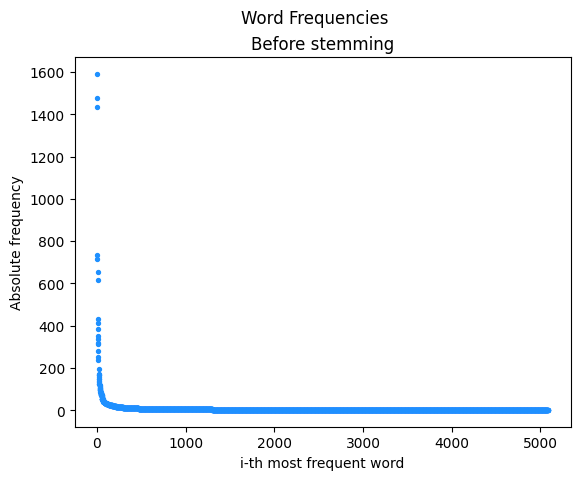

In [ ]:
# Before stemming
word_counts_no_stem_list = word_counts_no_stem.most_common()
word_counts_no_stem_list = [list(t) for t in word_counts_no_stem_list]
word_counts_no_stem_list = list(zip(*word_counts_no_stem_list))

y = word_counts_no_stem_list[1]
x = np.array(range(1, len(y)+1))

# Plot log-log frequencies (in order)
fig, ax = plt.subplots()
ax.scatter(x, y, c='dodgerblue', s=8)
ax.set_xlabel('i-th most frequent word')
ax.set_ylabel('Absolute frequency')
fig.suptitle('Word Frequencies')
ax.set_title('Before stemming')
fig.show()

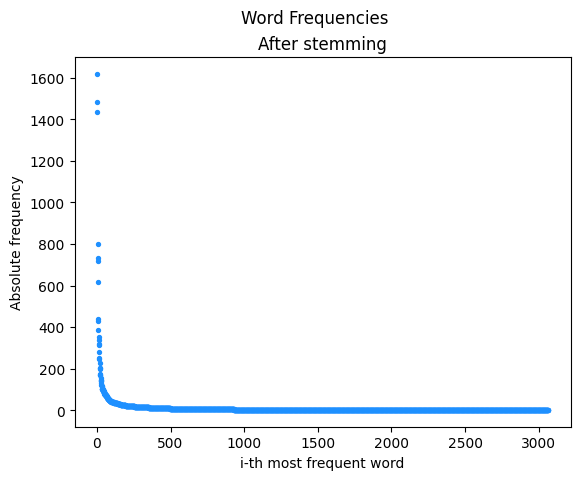

In [ ]:
# After stemming
word_counts_list = word_counts.most_common()
word_counts_list = [list(t) for t in word_counts_list]
word_counts_list = list(zip(*word_counts_list))

y = word_counts_list[1]
x = np.array(range(1, len(y)+1))

# Plot log-log frequencies (in order)
fig, ax = plt.subplots()
ax.scatter(x, y, c='dodgerblue', s=8)
ax.set_xlabel('i-th most frequent word')
ax.set_ylabel('Absolute frequency')
fig.suptitle('Word Frequencies')
ax.set_title('After stemming')
fig.show()

---

__Exercise 2.__ Now, plot the same but use _logarithmic_ $x$ and $y$ axes.

---

If our distribution is a powerlaw, this plot should be a straight line, whose slope is $a$
and intercept is $\log c$. If we put back the $b$ parameter, it distorts a bit the
low values, so in order to estimate $a$ and $c$ we have to pay attention to the large values.

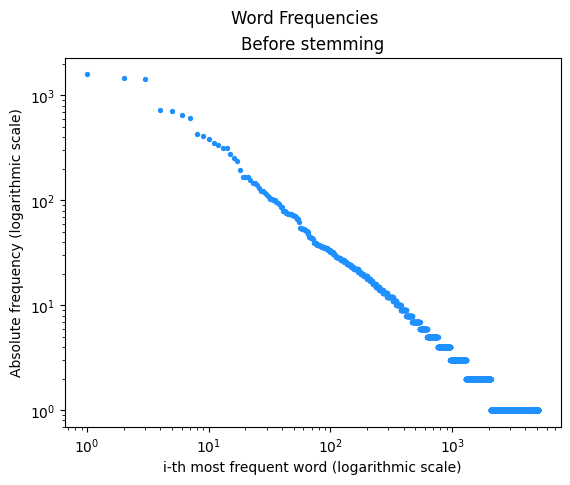

In [ ]:
# Before stemming
y = word_counts_no_stem_list[1]
x = np.array(range(1, len(y)+1))

# Plot log-log frequencies (in order)
fig, ax = plt.subplots()
ax.scatter(x, y, c='dodgerblue', s=8)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('i-th most frequent word (logarithmic scale)')
ax.set_ylabel('Absolute frequency (logarithmic scale)')
fig.suptitle('Word Frequencies')
ax.set_title('Before stemming')
fig.show()

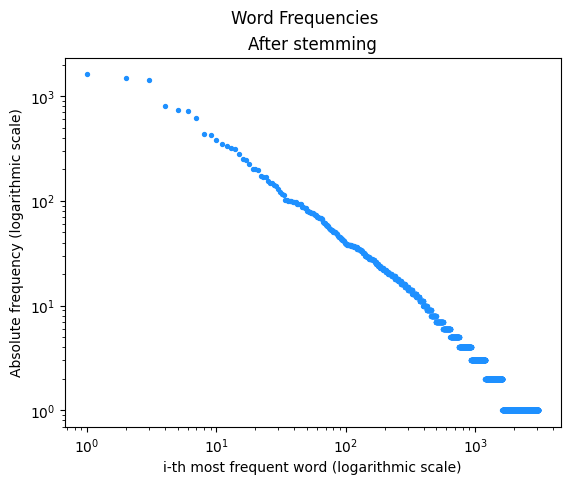

In [ ]:
# After stemming
y = word_counts_list[1]
x = np.array(range(1, len(y)+1))

# Plot log-log frequencies (in order)
fig, ax = plt.subplots()
ax.scatter(x, y, c='dodgerblue', s=8)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('i-th most frequent word (logarithmic scale)')
ax.set_ylabel('Absolute frequency (logarithmic scale)')
fig.suptitle('Word Frequencies')
ax.set_title('After stemming')
fig.show()

---

__Exercise 4.__ Let's find $a$ and $c$ analytically.
Assume we have $\log y = a \cdot \log x + \log c$.

---

Take two distinct _large_ values of $x$, find their corresponding values of $y$,
set up a system of two linear equations, and solve for $a$ and $c$.
The solution will probably not fit very well the low values of $x$. You can try to
make it better by adding the $b$ parameter, but don't agonize over it.

Alternatively, use linear regression to estimate the _slope_  ($a$ parameter) and the intercept ($\log c$ parameter).

The least fit-square returns:
     a = -0.9580977951130039
     c = 2515.4490535976092


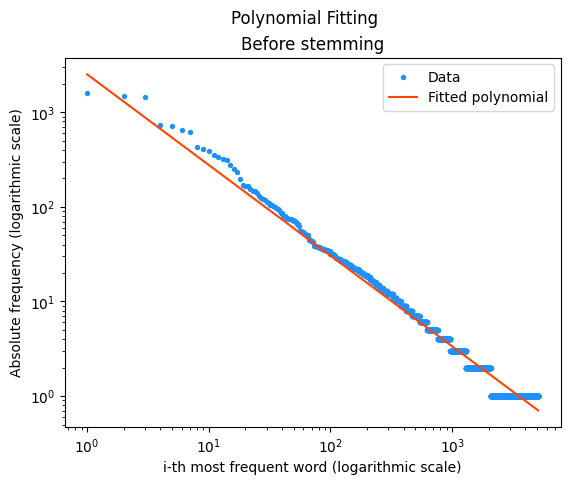

In [ ]:
# Before stemming
y = word_counts_no_stem_list[1]
x = np.array(range(1, len(y)+1))

# Fit a least-square polynomial
params_no_stem = P.polyfit(np.log10(x), np.log10(y), 1)
a_no_stem, c_no_stem = params_no_stem[1], np.power(10, params_no_stem[0])

print(f"The least fit-square returns:\n     a = {a_no_stem}\n     c = {c_no_stem}")

fig, ax = plt.subplots()
ax.scatter(x, y, c='dodgerblue', s=8, label='Data')
ax.plot(x, np.power(x, a_no_stem)*c_no_stem, c='orangered', label='Fitted polynomial')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('i-th most frequent word (logarithmic scale)')
ax.set_ylabel('Absolute frequency (logarithmic scale)')
fig.suptitle('Polynomial Fitting')
ax.set_title('Before stemming')
ax.legend()
fig.show()

The least fit-square returns:
     a = -1.1809016342382237
     c = 10164.992690794714


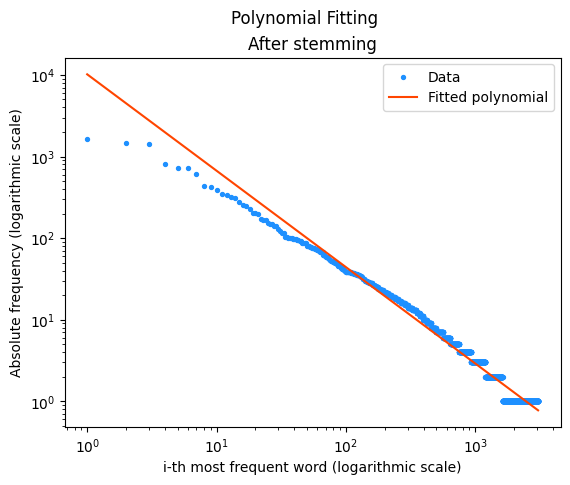

In [ ]:
# After stemming
y = word_counts_list[1]
x = np.array(range(1, len(y)+1))

# Fit a least-square polynomial
params_stem = P.polyfit(np.log10(x), np.log10(y), 1)
a_stem, c_stem = params_stem[1], np.power(10, params_stem[0])

print(f"The least fit-square returns:\n     a = {a_stem}\n     c = {c_stem}")

fig, ax = plt.subplots()
ax.scatter(x, y, c='dodgerblue', s=8, label='Data')
ax.plot(x, np.power(x, a_stem)*c_stem, c='orangered', label='Fitted polynomial')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('i-th most frequent word (logarithmic scale)')
ax.set_ylabel('Absolute frequency (logarithmic scale)')
fig.suptitle('Polynomial Fitting')
ax.set_title('After stemming')
ax.legend()
fig.show()

---

__Exercise 5.__  Now, it is time to check whether Heap's law applies in the _Don Quijote_. First, plot number of different words (word _types_) as a function of text length. Next, plot it on a log-log scale. You should see a straight line. Finally, give an estimate of $\beta$ parameter of Heap's law:

$$  d = k \cdot N^{\beta} $$

---

In [ ]:
TotalWords = []
WordTypes = []

for N in range(100, 30000, 100):
  data = urllib.request.urlopen(target_url)
  text = ""
  for i in range(N):
    text += ((next(data)).decode('latin-1').strip() + " ")

  tokenized_text = word_tokenize(text)
  filtered_tokenized_text = [w.lower() for w in tokenized_text if w.lower() not in spanish_sw]
  stemmed_text = [stemmer.stem(w) for w in filtered_tokenized_text]
  word_counts = Counter(stemmed_text)

  TotalWords += [len(tokenized_text)]
  WordTypes += [len(word_counts)]

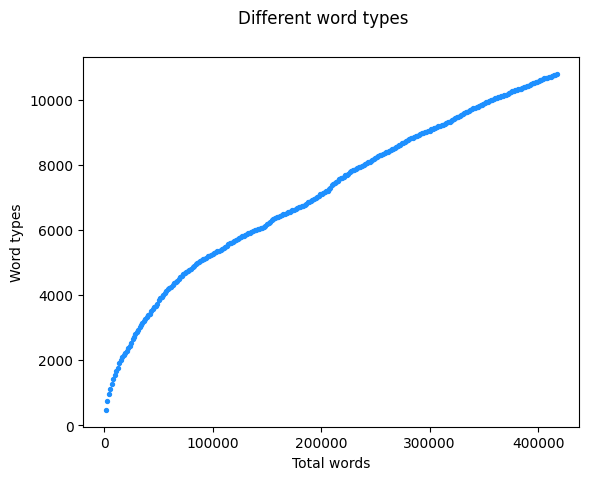

In [ ]:
fig, ax = plt.subplots()
ax.scatter(TotalWords, WordTypes, c='dodgerblue', s=8)
ax.set_xlabel('Total words')
ax.set_ylabel('Word types')
fig.suptitle('Different word types')
fig.show()

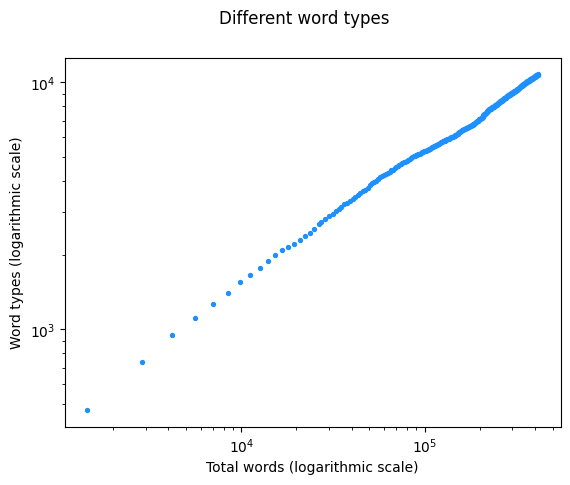

In [ ]:
fig, ax = plt.subplots()
ax.scatter(TotalWords, WordTypes, c='dodgerblue', s=8)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Total words (logarithmic scale)')
ax.set_ylabel('Word types (logarithmic scale)')
fig.suptitle('Different word types')
fig.show()

The least fit-square returns:
     beta = 0.5122119237153233
     k = 14.178959882181562


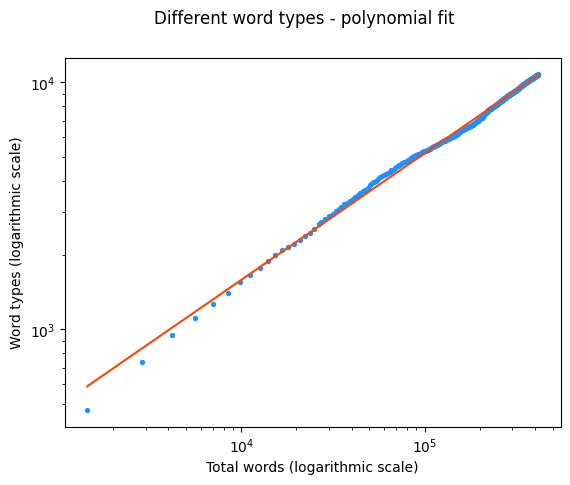

In [ ]:
x = np.array(TotalWords)
y = np.array(WordTypes)

# Fit a least-square polynomial
params = P.polyfit(np.log10(TotalWords), np.log10(WordTypes), 1)
b, k = params[1], np.power(10, params[0])

print(f"The least fit-square returns:\n     beta = {b}\n     k = {k}")

fig, ax = plt.subplots()
ax.scatter(x, y, c='dodgerblue', s=8, label='Data')
ax.plot(x, np.power(x, b)*k, c='orangered', label='Fitted Polynomial')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Total words (logarithmic scale)')
ax.set_ylabel('Word types (logarithmic scale)')
fig.suptitle('Different word types - polynomial fit')
fig.show()